# Scraping the webpage

In [38]:
from bs4 import BeautifulSoup
import requests

In [55]:
url = 'https://www.scrapethissite.com/pages/forms/?page_num=1'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup)

In [ ]:
table = soup.find_all('table')
print(table)

In [ ]:
# get table header/first row of the table
header = table[0].find_all('th')
print(header)

In [59]:
# extract header titles
headerList = [title.text.strip() for title in header]

In [60]:
print(headerList)   

['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %', 'Goals For (GF)', 'Goals Against (GA)', '+ / -']


In [61]:
import pandas as pd

In [62]:
# create a dataframe with the headerList as the column names
df = pd.DataFrame(columns = headerList)

df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -


In [63]:
# iterate through all pages

base_url = 'https://www.scrapethissite.com/pages/forms/?page_num='

for i in range(1, 25):
    url = base_url + str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    table = soup.find_all('table')

    team_data = table[0].find_all('tr', class_ = 'team')

    for row in team_data:
        row_data = row.find_all('td')
        raw_data = [data.text.strip() for data in row_data]

        # insert row_data into the dataframe
        df.loc[len(df)] = raw_data

In [64]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


In [65]:
df.to_csv("Hockey-Teams.csv", index=False)

# Exploratory Data Analysis

In [77]:
df = pd.read_csv('Hockey-Teams.csv')

In [78]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           582 non-null    object 
 1   Year                582 non-null    int64  
 2   Wins                582 non-null    int64  
 3   Losses              582 non-null    int64  
 4   OT Losses           358 non-null    float64
 5   Win %               582 non-null    float64
 6   Goals For (GF)      582 non-null    int64  
 7   Goals Against (GA)  582 non-null    int64  
 8   + / -               582 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 41.1+ KB


In [80]:
df.describe()

,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
count,582.000000,582.000000,582.000000,358.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,7.460894,0.458519,234.063574,234.063574,0.000000
std,6.330674,8.926081,8.411439,3.610191,0.102237,40.548915,42.510718,45.277458
min,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
25%,1996.000000,31.000000,27.000000,5.000000,0.390000,211.000000,207.000000,-27.000000
50%,2001.000000,38.000000,31.000000,7.000000,0.463000,231.000000,232.500000,4.000000
75%,2007.000000,43.000000,37.000000,10.000000,0.534000,254.000000,258.750000,31.000000
max,2011.000000,62.000000,71.000000,18.000000,0.756000,369.000000,414.000000,144.000000


In [81]:
df.isnull().sum()

Team Name               0
Year                    0
Wins                    0
Losses                  0
OT Losses             224
Win %                   0
Goals For (GF)          0
Goals Against (GA)      0
+ / -                   0
dtype: int64

In [82]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


In [83]:
df.nunique()

Team Name              35
Year                   21
Wins                   47
Losses                 47
OT Losses              18
Win %                  94
Goals For (GF)        172
Goals Against (GA)    169
+ / -                 178
dtype: int64

In [84]:
# get bottom 5 by number of wins
df.sort_values(by = "Wins").head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
108,Ottawa Senators,1994,9,34,NaN,0.188,117,174,-57
56,Ottawa Senators,1992,10,70,NaN,0.119,202,395,-193
60,San Jose Sharks,1992,11,71,NaN,0.131,218,414,-196
82,Ottawa Senators,1993,14,61,NaN,0.167,201,397,-196
225,Atlanta Thrashers,1999,14,57,4.0,0.171,170,313,-143


In [85]:
# get top 5 by number of wins
df.sort_values(by = "Wins", ascending=False).head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
126,Detroit Red Wings,1995,62,13,NaN,0.756,325,181,144
382,Detroit Red Wings,2005,58,16,8.0,0.707,305,209,96
58,Pittsburgh Penguins,1992,56,21,NaN,0.667,367,268,99
550,Vancouver Canucks,2010,54,19,9.0,0.659,262,185,77
521,Washington Capitals,2009,54,15,13.0,0.659,318,233,85


In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [88]:
# aggregate the number of wins based on 'Team Name' column
aggregate_df = df.groupby('Team Name')['Wins'].sum().reset_index()

In [89]:
aggregate_df

,Team Name,Wins
0,Anaheim Ducks,257
1,Atlanta Thrashers,342
2,Boston Bruins,816
3,Buffalo Sabres,803
4,Calgary Flames,764
5,Carolina Hurricanes,515
6,Chicago Blackhawks,765
7,Colorado Avalanche,677
8,Columbus Blue Jackets,342
9,Dallas Stars,752


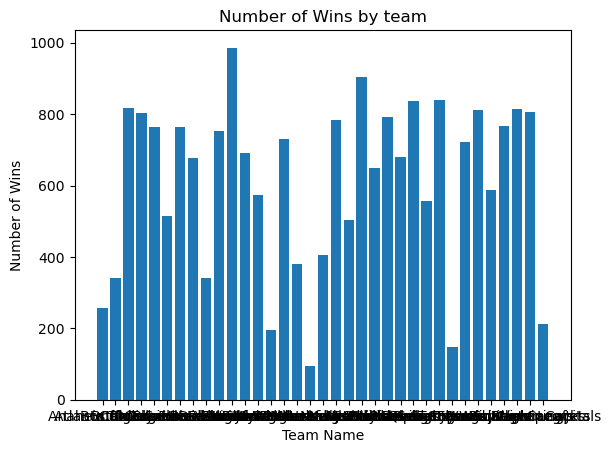

In [93]:
# create a bar gaph
plt.bar(aggregate_df['Team Name'], aggregate_df['Wins'])
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by team')
plt.show()